In [46]:
import os
path= os.getcwd()

if path.endswith('notebooks'):
    os.chdir('../')

In [47]:
# import dependencies
import numpy as np 
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
pd.set_option('display.max_columns', None)

In [48]:
# get the data
df= pd.read_csv("artifacts/data_ingestion/raw_data/home_insurance_train.csv")

In [49]:
df.head()

,uuid,quote_id,sale_flag,property_type,year_built,number_of_bedrooms,number_of_bathrooms,building_value,contents_value,coverage_level,number_of_occupants,has_smoke_alarms,has_burglar_alarm,pets_present,flood_risk_score,fire_risk_score,crime_rate_score,broker_name,policy_term,previous_claims_count,distance_to_fire_station,has_security_cameras,ownership_status,energy_efficiency_rating,pcd,lat,long,Premium
0,97692477-4e79-4239-b68d-f1e75e8f9727,Q0000000,0,Semi-Detached,1906,6,3,475369.0,112585.0,Bronze,4,1,0,0,0.49,0.36,0.06,BrokerB,12,3,18.44,0,Vacant,B,N4 3BH,51.566409,-0.119991,1740.49
1,a1f0165c-4f0c-465d-bf8e-5998a57e75f5,Q0000001,1,Terraced,1946,4,2,112530.0,7451.0,Bronze,3,1,0,1,0.08,0.33,0.20,BrokerC,36,2,4.42,0,Vacant,A,BT342PL,54.154194,-6.313653,677.71
2,403f057a-b3ed-439b-a8e0-67134879c9a9,Q0000002,0,Flat,1926,5,2,337412.0,40202.0,Bronze,3,1,0,1,0.32,0.49,0.27,BrokerA,36,5,21.04,0,Owner-occupied,A,SO506JS,50.977035,-1.328926,1441.61
3,698d2f13-2123-4fec-a6fa-52c857245a70,Q0000003,0,Detached,1953,1,3,496935.0,105234.0,Silver,1,1,0,0,0.69,0.31,0.37,BrokerA,24,5,18.18,0,Owner-occupied,E,NR302SA,52.602705,1.727722,1957.38
4,d4c386f9-cfb6-4be4-a28d-4da57c35b3fc,Q0000004,0,Terraced,1910,4,1,457227.0,67499.0,Bronze,6,0,0,0,0.87,0.74,0.32,BrokerA,24,1,3.81,0,Vacant,B,ST4 2QE,53.000934,-2.166444,1543.64


In [50]:
# Drop uuid and quote_id as they are not useful for prediction

df= df.drop(columns= ['uuid', 'quote_id'], axis= 1)

In [51]:
df

,sale_flag,property_type,year_built,number_of_bedrooms,number_of_bathrooms,building_value,contents_value,coverage_level,number_of_occupants,has_smoke_alarms,has_burglar_alarm,pets_present,flood_risk_score,fire_risk_score,crime_rate_score,broker_name,policy_term,previous_claims_count,distance_to_fire_station,has_security_cameras,ownership_status,energy_efficiency_rating,pcd,lat,long,Premium
0,0,Semi-Detached,1906,6,3,475369.0,112585.0,Bronze,4,1,0,0,0.49,0.36,0.06,BrokerB,12,3,18.44,0,Vacant,B,N4 3BH,51.566409,-0.119991,1740.49
1,1,Terraced,1946,4,2,112530.0,7451.0,Bronze,3,1,0,1,0.08,0.33,0.20,BrokerC,36,2,4.42,0,Vacant,A,BT342PL,54.154194,-6.313653,677.71
2,0,Flat,1926,5,2,337412.0,40202.0,Bronze,3,1,0,1,0.32,0.49,0.27,BrokerA,36,5,21.04,0,Owner-occupied,A,SO506JS,50.977035,-1.328926,1441.61
3,0,Detached,1953,1,3,496935.0,105234.0,Silver,1,1,0,0,0.69,0.31,0.37,BrokerA,24,5,18.18,0,Owner-occupied,E,NR302SA,52.602705,1.727722,1957.38
4,0,Terraced,1910,4,1,457227.0,67499.0,Bronze,6,0,0,0,0.87,0.74,0.32,BrokerA,24,1,3.81,0,Vacant,B,ST4 2QE,53.000934,-2.166444,1543.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,Detached,2013,4,1,333094.0,16895.0,Bronze,2,1,0,1,0.99,0.72,0.55,BrokerB,36,5,13.82,0,Vacant,A,LE115YU,52.783850,-1.237813,1578.68
999996,0,Semi-Detached,1998,2,2,161059.0,90527.0,Silver,4,1,0,1,0.29,0.18,0.97,BrokerA,24,1,7.21,0,Owner-occupied,A,TN163LT,51.310164,0.040593,972.78
999997,0,Detached,1917,4,1,449476.0,106370.0,Bronze,4,0,1,0,0.75,0.72,0.81,BrokerA,12,3,21.72,0,Owner-occupied,D,MK451ZE,52.004036,-0.498100,1768.00
999998,0,Semi-Detached,1918,1,1,465286.0,133269.0,Bronze,3,1,1,0,0.18,0.66,0.40,BrokerB,24,4,11.27,1,Owner-occupied,D,LE167NN,52.478663,-0.922537,1695.68


In [52]:
# check if there is any missing values in the data
df.isnull().sum()

sale_flag                   0
property_type               0
year_built                  0
number_of_bedrooms          0
number_of_bathrooms         0
building_value              0
contents_value              0
coverage_level              0
number_of_occupants         0
has_smoke_alarms            0
has_burglar_alarm           0
pets_present                0
flood_risk_score            0
fire_risk_score             0
crime_rate_score            0
broker_name                 0
policy_term                 0
previous_claims_count       0
distance_to_fire_station    0
has_security_cameras        0
ownership_status            0
energy_efficiency_rating    0
pcd                         0
lat                         0
long                        0
Premium                     0
dtype: int64

In [53]:
# check if there is any duplicated rows
df.duplicated().sum()

np.int64(0)

In [54]:
df.shape

(1000000, 26)

In [55]:
# select the numerical cols
numerical_cols= [col for col in df.columns if df[col].dtypes != "object"]

In [56]:
numerical_cols

['sale_flag',
 'year_built',
 'number_of_bedrooms',
 'number_of_bathrooms',
 'building_value',
 'contents_value',
 'number_of_occupants',
 'has_smoke_alarms',
 'has_burglar_alarm',
 'pets_present',
 'flood_risk_score',
 'fire_risk_score',
 'crime_rate_score',
 'policy_term',
 'previous_claims_count',
 'distance_to_fire_station',
 'has_security_cameras',
 'lat',
 'long',
 'Premium']

In [57]:
# # Create a subplot with 5 columns and 4 rows
# fig, axes = plt.subplots(4, 5, figsize=(20, 16))

# # Flatten axes for easy iteration
# axes = axes.flatten()

# # Plot boxplot for each numerical column
# for i, col in enumerate(numerical_cols):
#     sns.boxplot(x=df[col], ax=axes[i])
#     axes[i].set_title(f'Boxplot of {col}')
#     axes[i].set_xlabel(col)
#     axes[i].set_ylabel('Value')

# # Adjust layout to prevent overlap
# plt.tight_layout()
# plt.show()


In [58]:
def outlier_removal(cols: list) -> pd.DataFrame:
    # iterate over the list of columns
    for col in cols:
        # calculate the Q1 (25th percentile) and Q3 (75th percentile)
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        # calculate the interquartile range (IQR)
        iqr = q3 - q1
        
        # calculate the upper and lower limit
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr
        
        # modify the original df by removing outliers
        df.drop(df[(df[col] < lower_limit) | (df[col] > upper_limit)].index, inplace=True)
    
    return df

# select the cols with outliers in it
outlier_cols = ['lat', 'long']

# update df after outlier removal
df = outlier_removal(cols=outlier_cols)


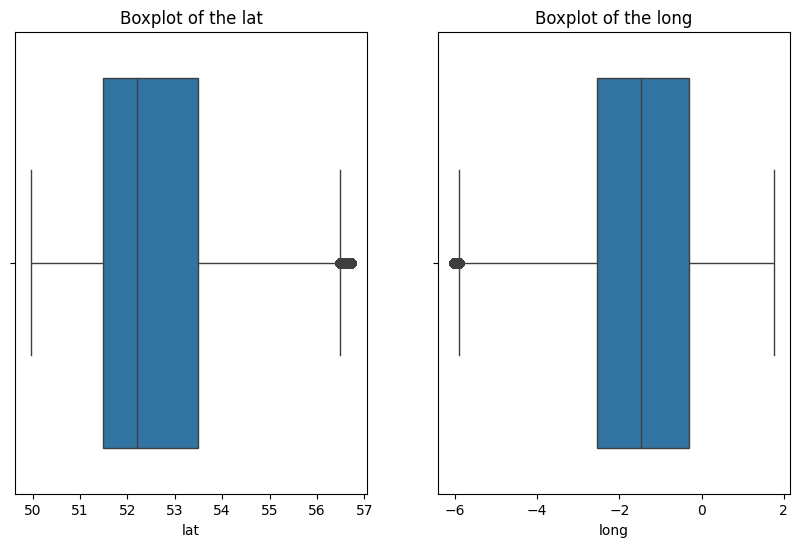

In [59]:
# lets check if these cols still has outliers or not

fig , ax= plt.subplots(ncols= 2, nrows= 1, figsize= (10,6))
ax= ax.flatten()

for index, col in enumerate(outlier_cols):
    sns.boxplot(x= df[col], ax= ax[index])
    ax[index].set_title(f"Boxplot of the {col}")

In [60]:
df.isnull().sum()

sale_flag                   0
property_type               0
year_built                  0
number_of_bedrooms          0
number_of_bathrooms         0
building_value              0
contents_value              0
coverage_level              0
number_of_occupants         0
has_smoke_alarms            0
has_burglar_alarm           0
pets_present                0
flood_risk_score            0
fire_risk_score             0
crime_rate_score            0
broker_name                 0
policy_term                 0
previous_claims_count       0
distance_to_fire_station    0
has_security_cameras        0
ownership_status            0
energy_efficiency_rating    0
pcd                         0
lat                         0
long                        0
Premium                     0
dtype: int64

In [61]:
# # lets check the distribution of each cateogry 

# # Create a subplot with 5 columns and 4 rows
# fig, axes = plt.subplots(4, 5, figsize=(20, 16))

# # Flatten axes for easy iteration
# axes = axes.flatten()

# # Plot distribution for each numerical column
# for i, col in enumerate(numerical_cols):
#     sns.histplot(df[col], kde=True, ax=axes[i])
#     axes[i].set_title(f'Distribution of {col}')
#     axes[i].set_xlabel(col)
#     axes[i].set_ylabel('Frequency')

# # Adjust layout to prevent overlap
# plt.tight_layout()
# plt.show()

In [62]:
# select the columns with their respective distribution
unifrom_dist_cols= [
                    'year_built', 'building_value', 'contents_value', 'flood_risk_score',
                     'fire_risk_score', 'crime_rate_score', 'distance_to_fire_station'
                    ]


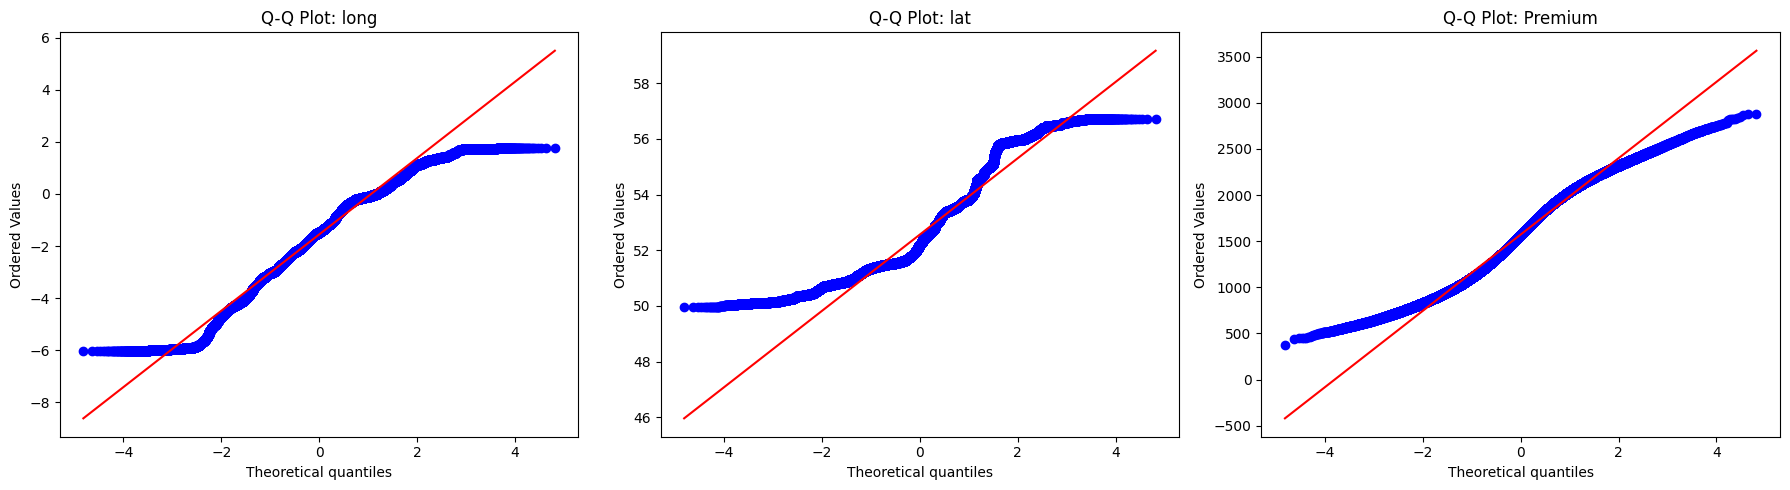

In [63]:
# lets check how close are the normal cols to be normal by qqplot test

normal_distribution_cols = ['long', 'lat', 'Premium']

# Create a subplot with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loop through first 3 columns and plot
for i, col in enumerate(normal_distribution_cols):
    sps.probplot(df[col], dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot: {col}')

plt.tight_layout()
plt.show()

* They are closed normal distribution so we will go for standard scaler on them.

In [64]:
# # lets check the distribution of each cateogry 

# # Create a subplot with 5 columns and 4 rows
# fig, axes = plt.subplots(4, 5, figsize=(20, 16))

# # Flatten axes for easy iteration
# axes = axes.flatten()

# # Plot distribution for each numerical column
# for i, col in enumerate(numerical_cols):
#     sns.histplot(df[col], kde=True, ax=axes[i])
#     axes[i].set_title(f'Distribution of {col}')
#     axes[i].set_xlabel(col)
#     axes[i].set_ylabel('Frequency')

# # Adjust layout to prevent overlap
# plt.tight_layout()
# plt.show()

In [65]:
df.shape

(956630, 26)

In [66]:
for col in unifrom_dist_cols:
    print(f"{col}: {df[col].nunique()}")

year_built: 124
building_value: 510865
contents_value: 144776
flood_risk_score: 101
fire_risk_score: 101
crime_rate_score: 101
distance_to_fire_station: 2491


In [67]:
df[unifrom_dist_cols].isna().sum()

year_built                  0
building_value              0
contents_value              0
flood_risk_score            0
fire_risk_score             0
crime_rate_score            0
distance_to_fire_station    0
dtype: int64

In [68]:
# let's apply min max scaling on the uniform distribution data
minmax_scaler = MinMaxScaler()

df[unifrom_dist_cols] = pd.DataFrame(minmax_scaler.fit_transform(df[unifrom_dist_cols]),
                                     columns=unifrom_dist_cols,
                                     index=df.index)


In [ ]:
# lets apply standardscaler on the normal dist cols
scaler= StandardScaler()

df[normal_distribution_cols]= pd.DataFrame(scaler.fit_transform(df[normal_distribution_cols]),
                                           columns= normal_distribution_cols,
                                           index= df.index)

In [70]:
df

,sale_flag,property_type,year_built,number_of_bedrooms,number_of_bathrooms,building_value,contents_value,coverage_level,number_of_occupants,has_smoke_alarms,has_burglar_alarm,pets_present,flood_risk_score,fire_risk_score,crime_rate_score,broker_name,policy_term,previous_claims_count,distance_to_fire_station,has_security_cameras,ownership_status,energy_efficiency_rating,pcd,lat,long,Premium
0,0,Semi-Detached,0.048780,6,3,0.593139,0.741966,Bronze,4,1,0,0,0.49,0.36,0.06,BrokerB,12,3,0.736546,0,Vacant,B,N4 3BH,-0.699256,0.972203,0.402971
2,0,Flat,0.211382,5,2,0.388759,0.242772,Bronze,3,1,0,1,0.32,0.49,0.27,BrokerA,36,5,0.840964,0,Owner-occupied,A,SO506JS,-1.112639,0.154987,-0.313220
3,0,Detached,0.430894,1,3,0.625089,0.691269,Silver,1,1,0,0,0.69,0.31,0.37,BrokerA,24,5,0.726104,0,Owner-occupied,E,NR302SA,0.027596,2.221222,0.922694
4,0,Terraced,0.081301,4,1,0.566262,0.431028,Bronze,6,0,0,0,0.87,0.74,0.32,BrokerA,24,1,0.148996,0,Vacant,B,ST4 2QE,0.306911,-0.411159,-0.068731
5,0,Flat,0.642276,5,3,0.068861,0.780076,Bronze,2,1,0,0,0.32,0.88,0.31,BrokerA,12,4,0.493976,0,Vacant,A,SY156UN,0.000815,-1.074348,-1.018916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,Detached,0.918699,4,1,0.382361,0.082034,Bronze,2,1,0,1,0.99,0.72,0.55,BrokerB,36,5,0.551004,0,Vacant,A,LE115YU,0.154650,0.216577,0.015234
999996,0,Semi-Detached,0.796748,2,2,0.127495,0.589841,Silver,4,1,0,1,0.29,0.18,0.97,BrokerA,24,1,0.285542,0,Owner-occupied,A,TN163LT,-0.878984,1.080755,-1.436655
999997,0,Detached,0.138211,4,1,0.554779,0.699103,Bronze,4,0,1,0,0.75,0.72,0.81,BrokerA,12,3,0.868273,0,Owner-occupied,D,MK451ZE,-0.392307,0.716609,0.468892
999998,0,Semi-Detached,0.146341,1,1,0.578201,0.884614,Bronze,3,1,1,0,0.18,0.66,0.40,BrokerB,24,4,0.448594,1,Owner-occupied,D,LE167NN,-0.059406,0.429698,0.295595


In [71]:
# lets get the categorical cols
cat_cols= [col for col in df.columns if df[col].dtypes == 'object']

In [72]:
df[cat_cols]

,property_type,coverage_level,broker_name,ownership_status,energy_efficiency_rating,pcd
0,Semi-Detached,Bronze,BrokerB,Vacant,B,N4 3BH
2,Flat,Bronze,BrokerA,Owner-occupied,A,SO506JS
3,Detached,Silver,BrokerA,Owner-occupied,E,NR302SA
4,Terraced,Bronze,BrokerA,Vacant,B,ST4 2QE
5,Flat,Bronze,BrokerA,Vacant,A,SY156UN
...,...,...,...,...,...,...
999995,Detached,Bronze,BrokerB,Vacant,A,LE115YU
999996,Semi-Detached,Silver,BrokerA,Owner-occupied,A,TN163LT
999997,Detached,Bronze,BrokerA,Owner-occupied,D,MK451ZE
999998,Semi-Detached,Bronze,BrokerB,Owner-occupied,D,LE167NN


In [73]:
# lets check number of unique values each col has will helps to decide which encoding to use
for col in cat_cols:
    print(f" {col}: {df[col].nunique()}")

 property_type: 4
 coverage_level: 4
 broker_name: 3
 ownership_status: 3
 energy_efficiency_rating: 5
 pcd: 800204


In [74]:
# lets define cols by their nature nominal, ordinal or high cardinality.
nominal_cols= ['property_type', 'broker_name', 'ownership_status']
ordinal_cols= ['coverage_level', 'energy_efficiency_rating']
high_cardinality= ['pcd']

In [75]:
# define the scalers 
ohe= OneHotEncoder(sparse_output= False)

In [76]:
# lets encode the nominal cols
for col in nominal_cols:
    encoded= pd.DataFrame(ohe.fit_transform(df[[col]]), columns= ohe.categories_[0], index= df.index)
    df= pd.concat([df, encoded], axis= 1).drop(col, axis= 1)

In [ ]:
ordinal_encode = OrdinalEncoder()

# lets encode the ordinal cols
for col in ordinal_cols:
    encoded = pd.DataFrame(ordinal_encode.fit_transform(df[[col]]),
                           columns=[col],
                           index=df.index)  
    df = pd.concat([df.drop(columns=[col]), encoded], axis=1)

In [81]:
# lets encode the high cardinality data
pcd_frequency= df['pcd'].value_counts() / len(df)
df['pcd']= df['pcd'].map(pcd_frequency)

In [82]:
df

,sale_flag,year_built,number_of_bedrooms,number_of_bathrooms,building_value,contents_value,number_of_occupants,has_smoke_alarms,has_burglar_alarm,pets_present,flood_risk_score,fire_risk_score,crime_rate_score,policy_term,previous_claims_count,distance_to_fire_station,has_security_cameras,pcd,lat,long,Premium,Detached,Flat,Semi-Detached,Terraced,BrokerA,BrokerB,BrokerC,Owner-occupied,Rented,Vacant,coverage_level,energy_efficiency_rating
0,0,0.048780,6,3,0.593139,0.741966,4,1,0,0,0.49,0.36,0.06,12,3,0.736546,0,0.000001,-0.699256,0.972203,0.402971,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0,0.211382,5,2,0.388759,0.242772,3,1,0,1,0.32,0.49,0.27,36,5,0.840964,0,0.000002,-1.112639,0.154987,-0.313220,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,0.430894,1,3,0.625089,0.691269,1,1,0,0,0.69,0.31,0.37,24,5,0.726104,0,0.000001,0.027596,2.221222,0.922694,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,4.0
4,0,0.081301,4,1,0.566262,0.431028,6,0,0,0,0.87,0.74,0.32,24,1,0.148996,0,0.000001,0.306911,-0.411159,-0.068731,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,0,0.642276,5,3,0.068861,0.780076,2,1,0,0,0.32,0.88,0.31,12,4,0.493976,0,0.000002,0.000815,-1.074348,-1.018916,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.918699,4,1,0.382361,0.082034,2,1,0,1,0.99,0.72,0.55,36,5,0.551004,0,0.000001,0.154650,0.216577,0.015234,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
999996,0,0.796748,2,2,0.127495,0.589841,4,1,0,1,0.29,0.18,0.97,24,1,0.285542,0,0.000002,-0.878984,1.080755,-1.436655,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0
999997,0,0.138211,4,1,0.554779,0.699103,4,0,1,0,0.75,0.72,0.81,12,3,0.868273,0,0.000001,-0.392307,0.716609,0.468892,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
999998,0,0.146341,1,1,0.578201,0.884614,3,1,1,0,0.18,0.66,0.40,24,4,0.448594,1,0.000001,-0.059406,0.429698,0.295595,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0


In [79]:
df.isnull().sum()

sale_flag                   0
year_built                  0
number_of_bedrooms          0
number_of_bathrooms         0
building_value              0
contents_value              0
number_of_occupants         0
has_smoke_alarms            0
has_burglar_alarm           0
pets_present                0
flood_risk_score            0
fire_risk_score             0
crime_rate_score            0
policy_term                 0
previous_claims_count       0
distance_to_fire_station    0
has_security_cameras        0
pcd                         0
lat                         0
long                        0
Premium                     0
Detached                    0
Flat                        0
Semi-Detached               0
Terraced                    0
BrokerA                     0
BrokerB                     0
BrokerC                     0
Owner-occupied              0
Rented                      0
Vacant                      0
coverage_level              0
energy_efficiency_rating    0
dtype: int

In [80]:
# split the columns into features and target
x= df.drop(columns= ['Premium'], axis= 1)
y= df['Premium']

In [85]:
ordinal_mapping = [['Gold', 'Silver', 'Platinum', 'Bronze'],  # coverage_level
                           ['A', 'B', 'C', 'D', 'E']]  

In [ ]:
df

In [20]:
import os

path= os.getcwd()

if path.endswith('notebooks'):
    os.chdir("../")

In [22]:
import pandas as pd 
import joblib
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd

# Define column lists
nominal_cols = ['property_type', 'broker_name', 'ownership_status']
ordinal_cols = ['coverage_level', 'energy_efficiency_rating']
high_cardinality_col = ['pcd']
uniform_cols = ['year_built', 'building_value', 'contents_value', 'flood_risk_score', 'fire_risk_score', 'crime_rate_score', 'distance_to_fire_station']
normal_cols = ['long', 'lat']

# Ordinal mappings (adjust these based on actual values in your data)
ordinal_mapping = [['Gold', 'Silver', 'Platinum', 'Bronze'], ['A', 'B', 'C', 'D', 'E']]

# Define FrequencyEncoding class
class FrequencyEncoding(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column
        self.frequency_maps = {}

    def fit(self, x, y=None):
        x_series = pd.Series(x.ravel())  # Convert 2D array to 1D Series
        self.frequency_maps = x_series.value_counts(normalize=True)
        return self

    def transform(self, x):
        x_series = pd.Series(x.ravel())  # Convert 2D array to 1D Series
        return x_series.map(self.frequency_maps).to_numpy().reshape(-1, 1)

# Load the dataset
df = pd.read_csv("artifacts/data_ingestion/raw_data/home_insurance_train.csv")

# Drop unnecessary columns (uuid and quote_id)
df.drop(columns=['uuid', 'quote_id'], inplace=True)

# Separate target variable (Premium)
target = df['Premium']
df.drop(columns=['Premium'], inplace=True)



# Define pipelines for various data preprocessing techniques
frequency_encoding_pipeline = Pipeline([ 
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('frequency_encoding', FrequencyEncoding(column='pcd'))  # Apply frequency encoding on 'pcd'
])

nominal_pipeline = Pipeline([ 
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

ordinal_pipeline = Pipeline([ 
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=ordinal_mapping))  # Use the appropriate ordinal mappings
])

uniform_pipeline = Pipeline([ 
    ('imputer', SimpleImputer(strategy='median')),
    ('minmax', MinMaxScaler())
])

normal_pipeline = Pipeline([ 
    ('imputer', SimpleImputer(strategy='median')),
    ('std', StandardScaler())
])

# Define the column transformer to apply different pipelines to respective columns
transformer = ColumnTransformer(
    transformers=[ 
        ('nominal', nominal_pipeline, nominal_cols),  # Apply one-hot encoding to nominal columns
        ('ordinal', ordinal_pipeline, ordinal_cols),  # Apply ordinal encoding to ordinal columns
        ('uniform', uniform_pipeline, uniform_cols),  # Apply uniform scaling to uniform columns
        ('normal', normal_pipeline, normal_cols),  # Apply normalization to normal columns
        ('frequency_encoding', frequency_encoding_pipeline, high_cardinality_col)  # Apply frequency encoding to high cardinality column
    ], 
    remainder='passthrough'  # Keep any remaining columns unchanged
)

# Debugging Step 3: Try to fit and transform and catch any errors
try:
    print("Fitting and transforming the data...")
    transformed_data = transformer.fit_transform(X=df)
    print("Transformation successful")
except Exception as e:
    print(f"Error during transformation: {e}")


Columns in the DataFrame: Index(['sale_flag', 'property_type', 'year_built', 'number_of_bedrooms',
       'number_of_bathrooms', 'building_value', 'contents_value',
       'coverage_level', 'number_of_occupants', 'has_smoke_alarms',
       'has_burglar_alarm', 'pets_present', 'flood_risk_score',
       'fire_risk_score', 'crime_rate_score', 'broker_name', 'policy_term',
       'previous_claims_count', 'distance_to_fire_station',
       'has_security_cameras', 'ownership_status', 'energy_efficiency_rating',
       'pcd', 'lat', 'long'],
      dtype='object')
Nominal Columns:  []
Ordinal Columns:  []
High Cardinality Columns:  []
Uniform Columns:  []
Normal Columns:  []
Fitting and transforming the data...
Transformation successful


In [35]:
transformed_data

array([[ 0.,  0.,  1., ..., 12.,  3.,  0.],
       [ 0.,  0.,  0., ..., 36.,  2.,  0.],
       [ 0.,  1.,  0., ..., 36.,  5.,  0.],
       ...,
       [ 1.,  0.,  0., ..., 12.,  3.,  0.],
       [ 0.,  0.,  1., ..., 24.,  4.,  1.],
       [ 1.,  0.,  0., ..., 36.,  2.,  1.]], shape=(1000000, 32))

In [36]:
model= joblib.load(filename= "artifacts/model_training/model.joblib")

In [38]:
model.fit(transformed_data, target)

StackingRegressor(estimators=[('catboost',
                               <catboost.core.CatBoostRegressor object at 0x00000210110D8C20>),
                              ('linear', LinearRegression())],
                  final_estimator=LinearRegression())